In [1]:
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import networkx as nx

plt.rc('font',family='NanumBarunGothic')

%matplotlib inline


#blog크롤링과 워드클라우드를 하나로 합친 함수
#나중에 이것만 호출하면 자동으로 된다.
def get_blog():
    keyword = input('검색어를 입력하세요:')
    client_id = "OKQPTGKiQf0V3yitzK6o"
    client_secret = "uIGSvzveCB"

    encText = urllib.parse.quote(keyword)

    tlist = []
    llist = []
    dlist = []



    for pagenum in range(1,1000,100):

        try:

            url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)# json 결과   블로그 1~100  101~200
            # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
            request = urllib.request.Request(url)
            request.add_header("X-Naver-Client-Id",client_id)
            request.add_header("X-Naver-Client-Secret",client_secret)
            response = urllib.request.urlopen(request)
            rescode = response.getcode()
            if(rescode==200):
                response_body = response.read()
                jtemp = response_body.decode('utf-8')
                jdata = json.loads(jtemp)

                jdata['items']

                for temp in jdata['items']:  
                    hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                    tdata = temp['title']
                    ldata = temp['link']
                    ddata = hangul.sub(r'',temp['description'])

                    tlist.append(tdata)
                    llist.append(ldata)
                    dlist.append(ddata)

            else:
                print("Error Code:" + rescode)

        except:
            print('Error')



    result = []
    for temp in range(len(tlist)):
        temp1 = []
        temp1.append(tlist[temp])
        temp1.append(llist[temp])
        temp1.append(dlist[temp])

        result.append(temp1)


    f = open('{0} - 네이버API 블로그검색.csv'.format(keyword) , 'w', encoding='utf-8')
    f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
    for temp in result:    
        f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
    f.close()
    
    #여기서 결과를 리턴해줘야 쓸수있음
    return result



In [2]:
blogdata = get_blog()

검색어를 입력하세요:노인보호구역


In [3]:
blogdata

[['<b>노인보호구역</b> ‘실버존’ 제대로 알고 지켜주세요!',
  'https://blog.naver.com/safeppy?Redirect=Log&logNo=222008845357',
  '어린이 보호구역처럼 노인들 역시 많은 보호와 관심이 필요합니다 복지관을 이용하며 노인보호구역을 매일 지난다는 세 김 할머니는 내 앞을 씽 지나가는 차량 때문에 놀라 넘어질 뻔한 적이 있다 우리는 '],
 ['어린이,장애인,<b>노인 보호구역</b> 벌점 범칙금 과태료',
  'https://blog.naver.com/lky94312?Redirect=Log&logNo=222076100907',
  '도로에서 운전을 하다 보면 어린이보호구역 노인보호구역 장애인보호구역이라는 표시를 보게 된다 교통약자 보호구역 및 관련시설 교통약자보호구역은 어린이 노인 장애인 등과 같이 신체적으로 '],
 ['<b>노인보호구역</b>, 실버존(Silver Zone)',
  'https://blog.naver.com/12sunrise703?Redirect=Log&logNo=222324946366',
  '지방자치단체는 노인을 교통사고 위험에서 보호하기 위해 노인보호구역을 지정하여 운영하고 있는데요 하지만 어린이 보호구역에 비해 많이 알려지지 않았습니다 노인복지시설이나 의료시설 '],
 ['어린이 보호 구역과 비슷한 ‘<b>노인보호구역</b>(실버존)’은... ',
  'https://blog.naver.com/troyflow?Redirect=Log&logNo=221970087350',
  '또한 노인보호구역에 횡단보도가 설치된 경우 걸음이 느린 노인분들을 위해 일반 보행자 신호에 비해 긴 시간이 주어집니다 보호구역에서는 범칙금과 과태료가 배 실버존은 어린이보호구역인 스쿨존과 '],
 ['<b>노인 보호구역</b> 실버존을 아시나요!',
  'https://blog.naver.com/dolcejian?Redirect=Log&logNo=222395543062',
  ' 노인들을 위한 시설 이외에

In [8]:
blogdata_list = []

for temp in blogdata:
    blogdata_list.append(temp[2])
blogdata_list

['어린이 보호구역처럼 노인들 역시 많은 보호와 관심이 필요합니다 복지관을 이용하며 노인보호구역을 매일 지난다는 세 김 할머니는 내 앞을 씽 지나가는 차량 때문에 놀라 넘어질 뻔한 적이 있다 우리는 ',
 '도로에서 운전을 하다 보면 어린이보호구역 노인보호구역 장애인보호구역이라는 표시를 보게 된다 교통약자 보호구역 및 관련시설 교통약자보호구역은 어린이 노인 장애인 등과 같이 신체적으로 ',
 '지방자치단체는 노인을 교통사고 위험에서 보호하기 위해 노인보호구역을 지정하여 운영하고 있는데요 하지만 어린이 보호구역에 비해 많이 알려지지 않았습니다 노인복지시설이나 의료시설 ',
 '또한 노인보호구역에 횡단보도가 설치된 경우 걸음이 느린 노인분들을 위해 일반 보행자 신호에 비해 긴 시간이 주어집니다 보호구역에서는 범칙금과 과태료가 배 실버존은 어린이보호구역인 스쿨존과 ',
 ' 노인들을 위한 시설 이외에도 공원 또는 문화 센터 시설에도 실버존으로 지정했다고 합니다 노인 보호구역은 스쿨존인 어린이보호구역이랑 똑같이 시속 로 주행해야 하고 주정차는 금지입니다 ',
 ' 어린이보호구역 개소노인보호구역 개소 신규 지정  태양광  표지판 노면 도색 등 어린이보호구역 시작점에 설치된 태양광  표지판 강동구구청장 이정훈가 어린이 노인 등 교통약자에게 안전한 ',
 '어린이 보호구역과 노인 보호구역 및 장애인 보호구역에서 시속 를 초과하는 과속에 대해 회 위반 시 보험료  할증 회 이상 위반 시 보험료  할증이 적용됩니다 횡단보도에서 보행자 보호 의무를 ',
 '서울시는 지난 월 전통시장 주변에 노인보행사고 발생률이 높아 전통시장 주변을 노인보호구역으로 서울시장이 직권으로 지정하겠다고 발표했다 노인보호구역으로 지정되면 차량속도가 시속 로 ',
 '노인 보호구역은 교통약자인 노인을 보호하기 위해 경로당 양로원 노인 복지시설과 같이 노인들의 통행량이 많은 구역에 설치되며 실버존 이라고도 불립니다 방금 안내해드린 어린이 보호구역 ',
 '시는 작년에 교통사고로 사망한 보행자 명 중 명이 

In [9]:
#korean pos tags comparison chart 에서 Tag 찾아서 분석하면된다.


In [10]:
from konlpy.tag import Komoran

def tag_contents(contents):
    tag_result = []
    #안에있는 기능쓰려고 객체로 만들어줌
    ma = Komoran()
    
    for temp in contents:
        ma_content = ma.pos(temp)
        tag_result.append(ma_content)
    
    return tag_result
    
ma_result = tag_contents(blogdata_list)
ma_result




java.lang.NullPointerException: java.lang.NullPointerException: Cannot invoke "java.lang.Integer.intValue()" because the return value of "kr.co.shineware.util.common.model.Pair.getFirst()" is null

In [11]:
FILTER = ['NNG','NNP','XR']
STOPWORD = ['으로','어요','니다']

def tag_result_select(ma_result,FILTER,STOPWORD):
    tag_result_list = []
    for temp in ma_result:

        text_result = []

        for temp1, temp2 in temp:
            if temp2 in FILTER and temp1 not in STOPWORD:
                text_result.append(temp1)


        tag_result_list.append(text_result)
    
    return tag_result_list

    
tdata = tag_result_select(ma_result,FILTER,STOPWORD)
        

NameError: name 'ma_result' is not defined

In [ ]:
from collections import Counter
from itertools import combinations

# for temp in combinations(['정동','길','카페','커피'],2):
#     print(temp)


word_count = Counter()

def word_matrics(tdata):
    for temp in tdata:
        for word1, word2 in combinations(temp,2):
            if len(word1) == 1 or len(word2) == 1:
                continue
            if word1==word2:
                continue
            elif word_count[(word1,word2)] >=1 :
                word_count[(word1,word2)] += 1
            else:
                word_count[(word1,word2)] = 1
            
    return word_count

wresult = word_matrics(tdata)

In [10]:
wresult

Counter({('정동', '카페'): 4,
         ('정동', '라운드'): 1,
         ('정동', '앤드'): 1,
         ('정동', '커피'): 2,
         ('정동', '디저트'): 1,
         ('정동', '맛집'): 1,
         ('정동', '파란'): 1,
         ('정동', '하늘'): 1,
         ('정동', '녹색'): 1,
         ('정동', '나무'): 1,
         ('정동', '정동기'): 1,
         ('정동', '걷기'): 1,
         ('정동', '이랑'): 1,
         ('정동', '건강'): 1,
         ('카페', '라운드'): 1,
         ('카페', '앤드'): 1,
         ('카페', '커피'): 674,
         ('카페', '디저트'): 26,
         ('카페', '맛집'): 12,
         ('카페', '파란'): 3,
         ('카페', '하늘'): 3,
         ('카페', '녹색'): 1,
         ('카페', '나무'): 6,
         ('카페', '정동기'): 1,
         ('카페', '걷기'): 1,
         ('카페', '이랑'): 9,
         ('카페', '건강'): 1,
         ('라운드', '앤드'): 1,
         ('라운드', '커피'): 20,
         ('라운드', '디저트'): 1,
         ('라운드', '맛집'): 1,
         ('라운드', '파란'): 1,
         ('라운드', '하늘'): 1,
         ('라운드', '녹색'): 1,
         ('라운드', '나무'): 1,
         ('라운드', '정동기'): 1,
         ('라운드', '걷기'): 1,
         ('라운드'

In [13]:
graphdata = []

for temp in wresult:
    data = (temp[0], temp[1], wresult[temp])
    graphdata.append(data)
graphdata

[('정동', '카페', 4),
 ('정동', '라운드', 1),
 ('정동', '앤드', 1),
 ('정동', '커피', 2),
 ('정동', '디저트', 1),
 ('정동', '맛집', 1),
 ('정동', '파란', 1),
 ('정동', '하늘', 1),
 ('정동', '녹색', 1),
 ('정동', '나무', 1),
 ('정동', '정동기', 1),
 ('정동', '걷기', 1),
 ('정동', '이랑', 1),
 ('정동', '건강', 1),
 ('카페', '라운드', 1),
 ('카페', '앤드', 1),
 ('카페', '커피', 674),
 ('카페', '디저트', 26),
 ('카페', '맛집', 12),
 ('카페', '파란', 3),
 ('카페', '하늘', 3),
 ('카페', '녹색', 1),
 ('카페', '나무', 6),
 ('카페', '정동기', 1),
 ('카페', '걷기', 1),
 ('카페', '이랑', 9),
 ('카페', '건강', 1),
 ('라운드', '앤드', 1),
 ('라운드', '커피', 20),
 ('라운드', '디저트', 1),
 ('라운드', '맛집', 1),
 ('라운드', '파란', 1),
 ('라운드', '하늘', 1),
 ('라운드', '녹색', 1),
 ('라운드', '나무', 1),
 ('라운드', '정동기', 1),
 ('라운드', '걷기', 1),
 ('라운드', '이랑', 1),
 ('라운드', '건강', 1),
 ('앤드', '커피', 2),
 ('앤드', '디저트', 1),
 ('앤드', '맛집', 1),
 ('앤드', '파란', 1),
 ('앤드', '하늘', 1),
 ('앤드', '녹색', 1),
 ('앤드', '나무', 1),
 ('앤드', '정동기', 1),
 ('앤드', '걷기', 1),
 ('앤드', '이랑', 1),
 ('앤드', '건강', 1),
 ('커피', '디저트', 54),
 ('커피', '맛집', 50),
 ('커피', '파란', 3),
 ('커피', '하늘', 6)

In [14]:
def count_key(t):
    return t[2]

graphdata.sort(key=count_key)
graphdata.reverse()
graphdata

[('카페', '커피', 674),
 ('커피', '카페', 542),
 ('커피', '머신', 225),
 ('커피', '원두', 123),
 ('머신', '커피', 111),
 ('오늘', '커피', 109),
 ('커피', '주문', 106),
 ('원두', '커피', 99),
 ('커피', '요즘', 92),
 ('커피', '메뉴', 90),
 ('아침', '커피', 88),
 ('위치', '커피', 85),
 ('요즘', '커피', 84),
 ('안녕하세요', '커피', 83),
 ('커피', '한잔', 80),
 ('커피', '위치', 80),
 ('커피', '방문', 78),
 ('추천', '커피', 77),
 ('더치', '커피', 74),
 ('선물', '커피', 74),
 ('커피', '사용', 72),
 ('커피', '추천', 72),
 ('커피', '시간', 70),
 ('강릉', '커피', 68),
 ('커피', '사람', 65),
 ('캡슐', '커피', 65),
 ('커피', '느낌', 64),
 ('시간', '커피', 63),
 ('커피', '생각', 63),
 ('맛집', '커피', 62),
 ('한잔', '커피', 60),
 ('커피', '정도', 60),
 ('커피', '하루', 60),
 ('이번', '커피', 60),
 ('카페', '위치', 59),
 ('커피', '사진', 59),
 ('소개', '커피', 58),
 ('커피', '카페인', 58),
 ('근처', '커피', 58),
 ('하루', '커피', 58),
 ('커피', '선물', 57),
 ('커피', '캡슐', 57),
 ('사진', '커피', 57),
 ('커피', '음료', 57),
 ('커피', '오늘', 56),
 ('커피', '아침', 55),
 ('커피', '아메리카노', 55),
 ('커피', '다양', 55),
 ('메뉴', '커피', 54),
 ('커피', '디저트', 54),
 ('아보카도', '커피', 53),
 ('아이스', '커피',

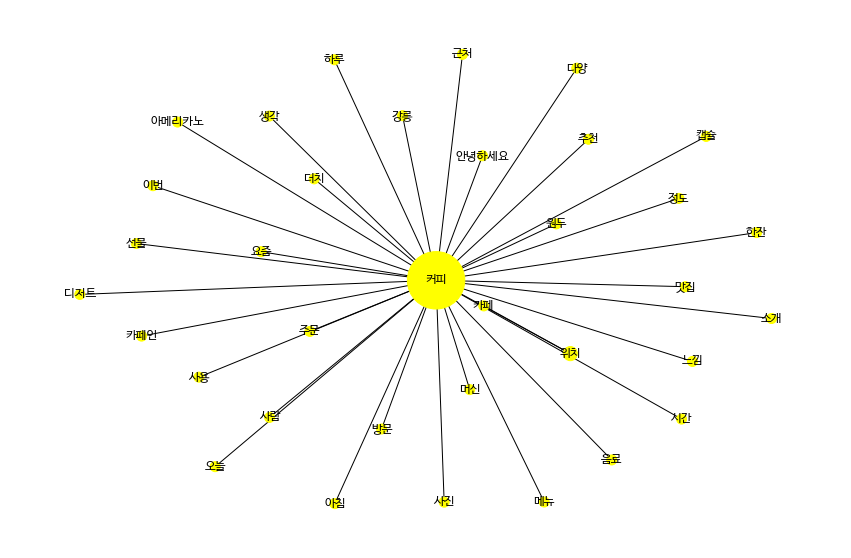

In [15]:
def sna_graph(word_data, NETWORK_MAX):
    
    G = nx.Graph()
    i = 0
    
    #edgr 생성
    for word1, word2, count in word_data:
        i += 1
        if i > NETWORK_MAX: break
            
        G.add_edge(word1,word2,weight=count)#가중치
    
    #MST모델 생성
    T = nx.minimum_spanning_tree(G)
    nodes = nx.nodes(T)
    degrees = nx.degree(T)
    
    #노드 사이즈
    node_size = []
    for node in nodes:
        ns = degrees[node] * 100
        node_size.append(ns)
    
    #그래프로 표현
    plt.figure(figsize=(15,10))
    nx.draw_networkx(T,
                    pos = nx.fruchterman_reingold_layout(G,k=0.5),
                    node_size = node_size,
                    node_color = 'yellow',
                    font_family='NanumBarunGothic',
                    with_labels=True,
                    font_size = 12
                    )
    plt.axis('off')
    plt.show()
sna_graph(graphdata, 50)